In [8]:
# import library, pandas to read the dataset, matplotlib to visualize data, and re to clean the text 
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Collect and Explore The Data

In [48]:
df = pd.read_csv('../project/Dataset Ministry of Hajj and Umrah Medina.csv')

In [49]:
#show first five dataframe content 
df.head()

,NO_,RESERVATION_NO,Permit_No,DATE_,TIME_FROM,TIME_TO,SEX_,AGE_,Assembly_POINT,Permit_KIND
0,1,47851116,94938233,06/09/2021,6:00 PM,9:00 PM,MALE,55,Bab Al Salam Square,Visiting the Prophet Muhammed
1,2,47851116,94938234,06/09/2021,6:00 PM,9:00 PM,FEMALE,22,Bab Al Salam Square,Visiting the Prophet Muhammed
2,3,47851116,94938235,06/09/2021,6:00 PM,9:00 PM,FEMALE,25,Bab Al Salam Square,Visiting the Prophet Muhammed
3,4,47851117,94938236,06/09/2021,6:00 PM,9:00 PM,FEMALE,25,Bab Al Salam Square,Visiting the Prophet Muhammed
4,5,47851118,94938237,06/09/2021,6:00 PM,9:00 PM,FEMALE,32,Bab Al Salam Square,Visiting the Prophet Muhammed


In [50]:
# explore the data type at each series
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NO_             3544 non-null   int64 
 1   RESERVATION_NO  3544 non-null   int64 
 2   Permit_No       3544 non-null   int64 
 3   DATE_           3544 non-null   object
 4   TIME_FROM       3544 non-null   object
 5   TIME_TO         3544 non-null   object
 6   SEX_            3544 non-null   object
 7   AGE_            3544 non-null   int64 
 8   Assembly_POINT  3544 non-null   object
 9   Permit_KIND     3544 non-null   object
dtypes: int64(4), object(6)
memory usage: 277.0+ KB


In [23]:
# check to null values 
df.isna().sum()

NO_               0
RESERVATION_NO    0
Permit_No         0
DATE_             0
TIME_FROM         0
TIME_TO           0
SEX_              0
AGE_              0
Assembly_POINT    0
Permit_KIND       0
dtype: int64

In [26]:
# check on columns 
df.columns

Index(['NO_', 'RESERVATION_NO', 'Permit_No', 'DATE_', 'TIME_FROM', 'TIME_TO',
       'SEX_', 'AGE_', 'Assembly_POINT', 'Permit_KIND'],
      dtype='object')

In [42]:
# convert the date into datetime object 
df['DATE_'] = pd.to_datetime(df['DATE_']).dt.date

In [30]:
# counting the RESERVATION values of Places
df['Permit_KIND'].value_counts()

Visiting the Prophet Muhammed     2836
Prayer in the Prophet's Mosque     708
Name: Permit_KIND, dtype: int64

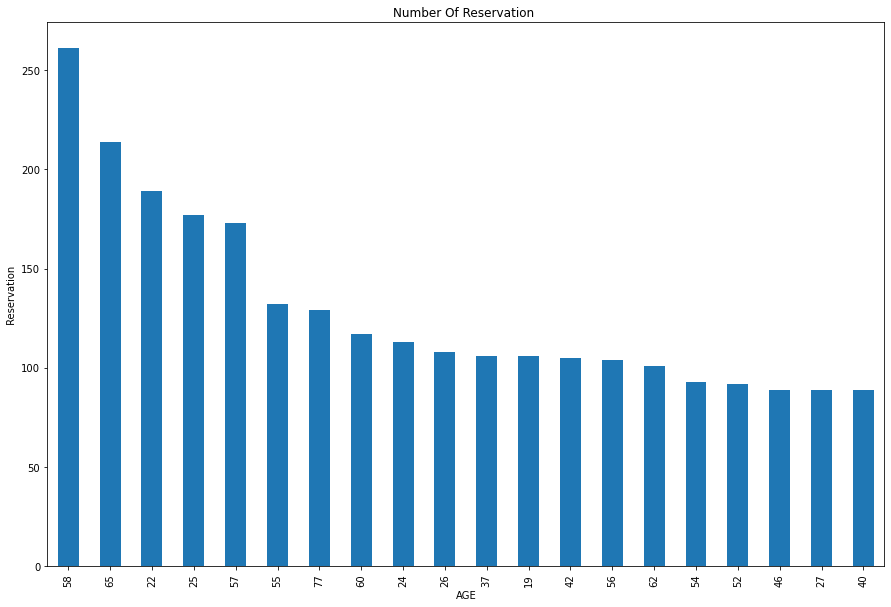

In [38]:
plt.figure(figsize=(15,10))
df['AGE_'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Number Of Reservation ')
plt.xlabel('AGE')
plt.ylabel(' Reservation ');

The figure of Number Of Reservation shows that most bookings were people 58 years old

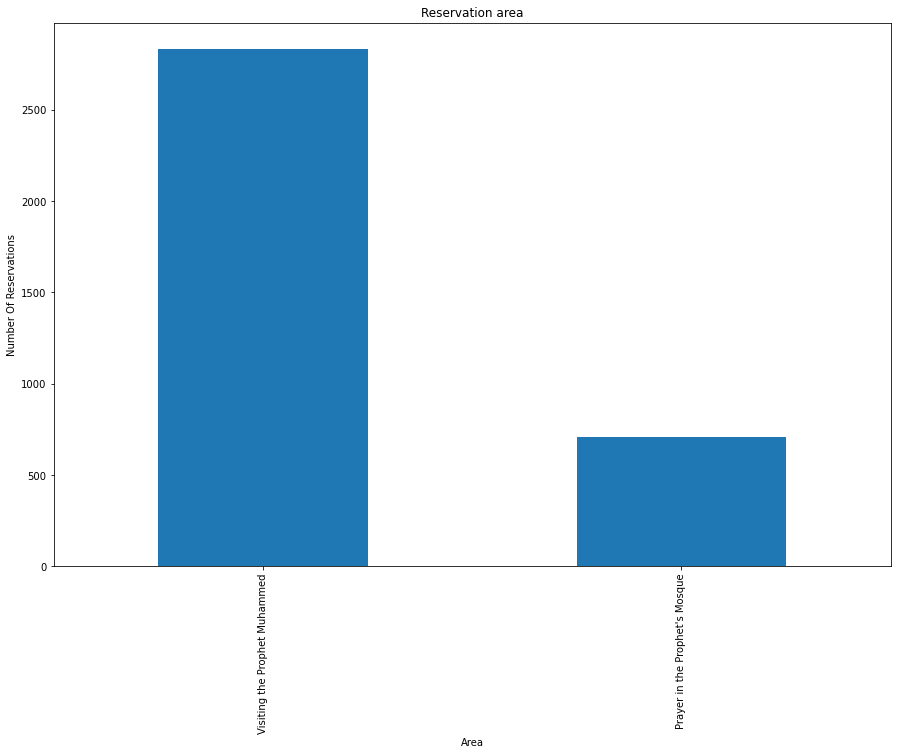

In [40]:
#Visualizing Tweet Platform-wise Distribution 
plt.figure(figsize=(15,10))
df['Permit_KIND'].value_counts().nlargest(12).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Reservation area')
plt.xlabel('Area')
plt.ylabel('Number Of Reservations');


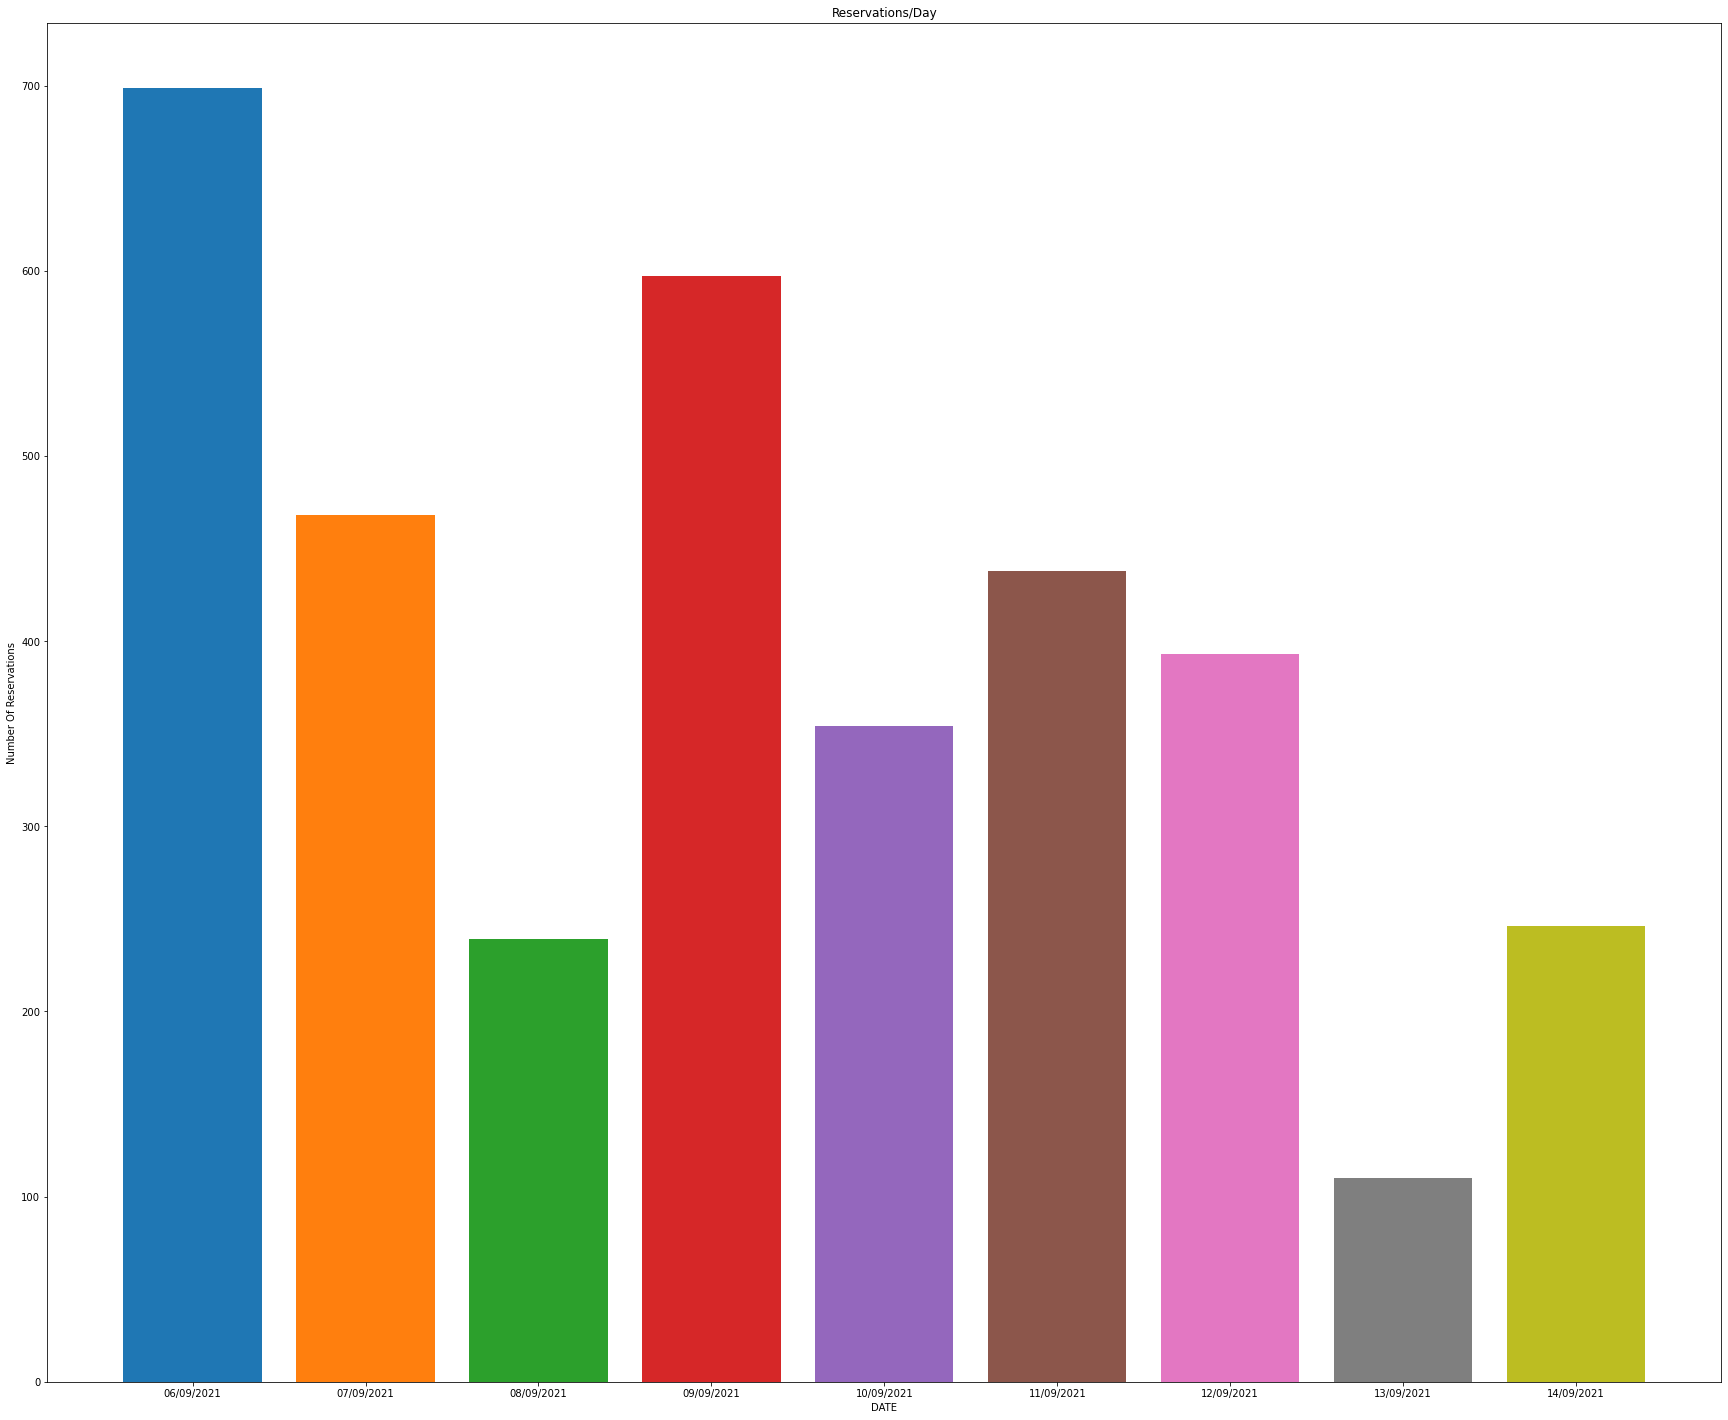

In [62]:
plt.figure(figsize=(30,25))
for i, group in df.groupby('DATE_'):
    plt.bar(group['DATE_'].iloc[0],group['Assembly_POINT'].count())
plt.ylabel('Number Of Reservations')
plt.xlabel('DATE')
plt.title('Reservations/Day'); 